# 1日目の復習＋α

## 1. 今日の量子コンピュータの問題

- Noisy Intermediate-Scale Quantum (NISQ) デバイス
    - 量子回路が深くなる（ゲート数が多くなる）ほど、誤差が大きくなる
    - 十分な量子ビット数ではない
- 量子デバイスは特別なゲート演算のみが用意されている
- 特定のqubits間の量子ビット演算(multi qubit operation)しか用意されていない
- それぞれの量子デバイスに対して、量子ソフトウェアツールキットが用意されてる


### 1-1. TKETとは
- Quantum Software Development Kit
- TKETに実装されている回路最適化はC++で実装
- pythonモジュール　`pytket`で利用可能
- 最適化コンパイラ：　ユーザーフレンドリーな回路→量子デバイスで実行可能な回路に変換可能
    - Language-agnostic (多くの量子プログラミングフレームワーク(qiskit, Cirq, etc)をサポート)
    - Retagetable (多くの量子デバイス(IBM, Quantinuum, Amazon Braket(IonQ, Rigetti, OQC), Microsoft Azure Quantum(Quantinuu,IonQ, Rigetti) etc)をサポート)
    - Circuit Optimisation (量子計算時に生じるデバイスエラーの影響を最小化。デバイス依存＆デバイス非依存のものが実装)
    
<img src="./fig/tket1.png" width="750">



#### 参照
- [pytket ドキュメント](https://tket.quantinuum.com/api-docs/)
- [pytket ユーザーガイド](https://tket.quantinuum.com/user-guide/)
- [t|ket⟩ : A Retargetable Compiler for NISQ Devices](https://arxiv.org/abs/2003.10611)
- [TKET slack channel](https://join.slack.com/t/tketusers/shared_invite/zt-2aoan2s87-WDdZQeY2dbJQgAQE6O~3qg)

<img src="./fig/slack-qr.png" width="250">


### 1-2. pytketと拡張 pytket (python パッケージ)
Python 3.10.11で動作確認をしています。

|  パッケージ |  概要  |
| :---- | :---- |
|  pytket  |  TKETを利用するためのpython モジュール  ( available for python3.10 or higher )|
|  pytket-quantinuum  |  Quantinuumデバイス、エミュレータを利用するためのpytket-extension  |
|  pytket-qiskit  |  qiskit、IMBQデバイスを利用するためのpytket-extension  |
|  pytket-azure  |  Azure Quantumを利用するためのpytket-extension  |
|  pytket-braket  |  Amazon Braketを利用するためのpytket-extension  |
|  pytket-circ    |  Google circを利用するためのpytket-extension  |
|  pytket-qulacs  |  Qulacsシミュレータを利用するためのpytket-extension  |

<img src="./fig/tket2.png" width="850">

## 2. 量子回路を作成する[復習]
ここでは `TKET`でGreenberger–Horne–Zeilinger状態を作成する。

### 2-1. `TKET`で4 qubitsのGreenberger–Horne–Zeilinger状態(GHZ状態)を作成
$$ |\Psi\rangle = \frac{1}{\sqrt{2}}(|0000\rangle+|1111\rangle)$$

In [1]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

ghz4 = Circuit(4)
ghz4.H(0).CX(0,1).CX(0,2).CX(0,3)
ghz4.measure_all()
render_circuit_jupyter(ghz4)

#### 研究者向け：量子回路のLatexソースを生成することが可能

In [2]:
ghz4.to_latex_file("ghz.tex")

### 2-2. `pytket-qiskit`でTKET 量子回路をIBMのローカルシミュレータで計算[復習]

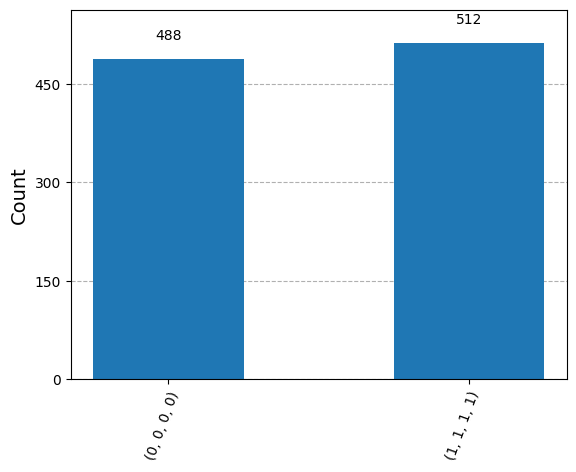

In [3]:
from qiskit.visualization import plot_histogram
from pytket.extensions.qiskit import AerBackend
aer_backend = AerBackend()

handle = aer_backend.process_circuit(ghz4, n_shots =1000)
result_counts = aer_backend.get_result(handle).get_counts()
plot_histogram(result_counts)

### 2-3. `pytket-qiskit`でTKET 量子回路をIBMの量子デバイスで計算[復習]

In [4]:
path = 'key/ibm-token'
f = open(path)
ibm_token = f.read()
f.close()
#from pytket.extensions.qiskit.backends.config import set_ibmq_config
#set_ibmq_config(ibmq_api_token=ibm_token, instance=f"ibm-q/open/main")

In [5]:
from qiskit_ibm_provider import IBMProvider
IBMProvider.save_account(token=ibm_token, overwrite=True)

In [6]:
from pytket.extensions.qiskit import IBMQBackend

In [7]:
device = IBMQBackend.available_devices()

In [8]:
[dev.device_name for dev in device]

['ibm_brisbane', 'ibm_kyiv', 'ibm_kyoto', 'ibm_sherbrooke']

In [9]:
# ibm_backend = AerBackend()
# ibm_backend = IBMQBackend("ibm_brisbane")
# ibm_backend = IBMQBackend("ibm_kyiv")
ibm_backend = IBMQBackend("ibm_kyoto")
# ibm_backend = IBMQBackend("ibm_sherbrooke")

In [10]:
# aer_backend を ibm_backendに変更
ibm_ghz4 = ibm_backend.get_compiled_circuit(ghz4)
handle = ibm_backend.process_circuit(ibm_ghz4, n_shots =1000)
#result_counts = ibm_backend.get_result(handle).get_counts()
#plot_histogram(result_counts)

In [ ]:
# get handle_id
#print(handle)

In [11]:
#from pytket.backends import ResultHandle
#from pytket.extensions.qiskit import IBMQBackend
#ibm_backend = IBMQBackend("ibmq_qasm_simulator")

In [12]:
#handle = "handle_id"
#result = ibm_backend.get_result(handle)
#counts = result.get_counts()
#print(counts)
#from qiskit.visualization import plot_histogram
#plot_histogram(counts)

### 2-4. `pytket-quantinuum`でTKET 量子回路をQuantinuum エミュレータで計算[復習]

In [11]:
from pytket.extensions.quantinuum import QuantinuumAPIOffline
api = QuantinuumAPIOffline()

In [12]:
from pytket.extensions.quantinuum import QuantinuumBackend
quantinuum_backend = QuantinuumBackend(device_name ='H1-1LE',api_handler = api)
#quantinuum_backend = QuantinuumBackend(device_name ='H2-1LE',api_handler = api)
quantinuum_ghz4 = quantinuum_backend.get_compiled_circuit(ghz4)
render_circuit_jupyter(quantinuum_ghz4)
render_circuit_jupyter(ghz4)

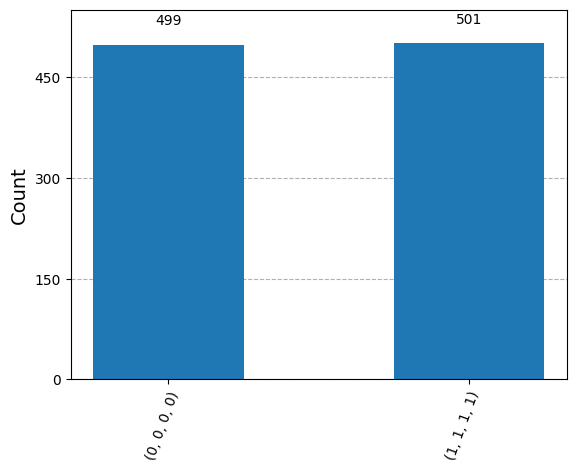

In [13]:
handle = quantinuum_backend.process_circuit(quantinuum_ghz4, n_shots=1000)
result = quantinuum_backend.get_result(handle)
counts = result.get_counts()
plot_histogram(counts)

### 2-6. `pytket-qulacs`でTKET 量子回路をQulacsシミュレータで計算[復習]

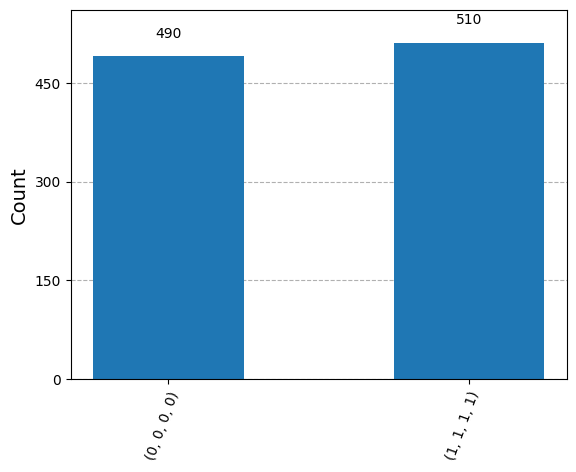

In [14]:
from pytket.extensions.qulacs import QulacsBackend
qulacs_backend = QulacsBackend()
handle = qulacs_backend.process_circuit(ghz4, n_shots =1000)
result_counts = qulacs_backend.get_result(handle).get_counts()
plot_histogram(result_counts)

## 3. 量子回路の最適化[復習]
例えば、Hゲートを同じビットに連続して作用させるとゲート操作をしていないのと恒等な量子状態が得られます。

量子回路が深くなる（ゲート数が多くなる）ほど、誤差が大きくなるNISQ デバイスでは左辺のような状況は除去したい。

その他にも様々な恒等な関係があります。

In [15]:
from pytket.pauli import Pauli
from pytket.circuit import PauliExpBox, fresh_symbol, OpType
from pytket.passes import DecomposeBoxes
box = PauliExpBox([Pauli.I, Pauli.Z, Pauli.X, Pauli.Y], fresh_symbol('tm'))
from pytket.utils import Graph
import numpy as np

def get_random_pauli_gadgets(n_qubits, n_pauli_gadgets, max_entangle):
    """ """
    paulis = [Pauli.I, Pauli.X, Pauli.Y, Pauli.Z]
    circ = Circuit(n_qubits)
    for i in range(n_pauli_gadgets):
        ls_paulis = [np.random.choice(paulis) for k in range(max_entangle)]
        if ls_paulis.count(Pauli.Y) % 2 == 0:
            continue
        if len(ls_paulis) - ls_paulis.count(Pauli.I) <= 1:
            continue
        qubits = np.random.choice(
            [i for i in range(n_qubits)], size=max_entangle, replace=False
        )
        box = PauliExpBox(ls_paulis, fresh_symbol('a'))
        circ.add_pauliexpbox(box, sorted(qubits))
    DecomposeBoxes().apply(circ)
    return circ

### 3-1. PauliSquash 関数を利用した、量子回路の最適化
TKETには量子回路を最適化する様々な機能が用意されている。
ここでは、PauliSquash 関数を利用した回路の最適化を行う。

（PauliSquash 関数：CX ゲートとTK1ゲートで表現された量子回路を出力）

ランダムな量子回路を作成し、回路の深さとCXの深さを数える。

In [16]:
circ = get_random_pauli_gadgets(
    n_qubits=8, n_pauli_gadgets=300, max_entangle=5
)
print('Circuit depth: ', circ.depth())
print('CX depth: ', circ.depth_by_type(OpType.CX))
render_circuit_jupyter(circ)

Circuit depth:  1035
CX depth:  652


PauliSquash 関数を使って、量子回路の最適化

In [17]:
# Circuit optimization by using compiler passes.
from pytket.passes import PauliSquash
circx = circ.copy()
PauliSquash().apply(circx)
print('Circuit depth: ', circx.depth())
print('CX depth: ', circx.depth_by_type(OpType.CX))
#render_circuit_jupyter(circx)

Circuit depth:  961
CX depth:  614
